# Coursera Capstone Project Code

### Accomodation in Copenhagen, Denmark - Potential Areas for new Hotel

## Import Packages

In [216]:
from math import sin, cos, sqrt, atan2, radians
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', 300)
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

## Get data from Foursquare API

**Credentials for Foursquare API**

In [13]:
CLIENT_ID = '211XBI0AQC2DQ50YGBD3X24R001QLJGZK41KF30V2JB1D1V3' # your Foursquare ID
CLIENT_SECRET = 'WTOZTTBYHPIPQUVWHRJE1XG2L3P3WYZE5JYFGCD41D5B3LXH' # your Foursquare Secret
VERSION = '20200517'
LIMIT = 10000

In [14]:
latitude= 55.6761 # latitude of Copenhagen City center
longitude= 12.5683 # longitude of Copenhagen City center
radius = 10000 # radius of 10 km from Copenhagen City center

*Getting data for the **Hotel** Category*

In [15]:
search_query = 'Hotel'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [16]:
hotel_results = requests.get(url).json()

In [17]:
venues_hotel = hotel_results['response']['venues']
df_hotel = json_normalize(venues_hotel)
df_hotel.shape

(50, 19)

*Getting data for the **Bed & Breakfast** Category*

In [18]:
search_query = 'Bed & Breakfast'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [19]:
BB_results = requests.get(url).json()
venues_BB = BB_results['response']['venues']
df_BB = json_normalize(venues_BB)
df_BB.shape

(13, 18)

*Getting data for the **Hostel** Category*

In [20]:
search_query = 'Hostel'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [21]:
Hostel_results = requests.get(url).json()
venues_Hostel = Hostel_results['response']['venues']
df_Hostel = json_normalize(venues_Hostel)
df_Hostel.shape

(22, 18)

*Getting data for the **Inn** Category*

In [22]:
search_query = 'Inn'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [23]:
INN_results = requests.get(url).json()
venues_INN = INN_results['response']['venues']
df_INN = json_normalize(venues_INN)
df_INN.shape

(46, 18)

*Getting data for the **Motel** Category*

In [24]:
search_query = 'Motel'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [25]:
Motel_results = requests.get(url).json()
venues_Motel = Motel_results['response']['venues']
df_Motel = json_normalize(venues_Motel)
df_Motel.shape

(1, 13)

*Getting data for the **Resort** Category*

In [26]:
search_query = 'Resort'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [27]:
Resort_results = requests.get(url).json()
venues_Resort = Resort_results['response']['venues']
df_Resort = json_normalize(venues_Resort)
df_Resort.shape

(6, 17)

__Foursquare Data Processing__

In [28]:
df_hotel['Category'] = 'Hotel'
df_BB['Category'] = 'BB'
df_Hostel['Category'] = 'Hostel'
df_Motel['Category'] = 'Motel'
df_Resort['Category'] = 'Resort'
df_INN['Category'] = 'Inn'
feat = ['categories', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country',
       'location.distance', 'location.lat', 'location.lng',
       'location.neighborhood', 'location.postalCode', 'location.state',
       'name', 'Category']
df_Resort['location.neighborhood'] = ''
df_Motel['location.neighborhood'] = ''
df_Motel['location.state'] = ''
df_Motel['location.city'] = ''
df_Motel['location.postalCode'] = ''
df_INN['location.neighborhood'] = ''

In [29]:
df1_hotel = df_hotel[feat]
df1_BB = df_BB[feat]
df1_Hostel = df_Hostel[feat]
df1_Motel = df_Motel[feat]
df1_Resort = df_Resort[feat]
df1_INN = df_INN[feat]
df_merge = df1_hotel.append([df1_BB, df1_Hostel, df1_Motel, df1_Resort,df1_INN])
df_final = df_merge.reset_index().drop('index', axis=1)
df_fsq = df_final.drop('categories', axis=1)

In [472]:
# function to calculate distance to Copenhagen city center
def calc_distance(lat,lon):
    # approximate radius of earth in km
    R = 6373.0

    cph_citycenter_lat = radians(latitude)
    cph_citycenter_lon = radians(longitude)
    lat2 = radians(lat)
    lon2 = radians(lon)

    dlon = lon2 - cph_citycenter_lon
    dlat = lat2 - cph_citycenter_lat

    a = sin(dlat / 2)**2 + cos(cph_citycenter_lat) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [31]:
df_fsq['Distance_to_Citycenter'] = df_fsq.apply(lambda x: calc_distance(x['location.lat'],x['location.lng']),axis=1)

In [203]:
df_fsq.to_csv('final_fsq_data.csv')

In [482]:
df_fsq = pd.read_csv('final_fsq_data.csv') 

## Import of AirBnB data for Copenhagen 
*Importing Data from AirBNB*

**AIRBnB Data** can be accessed through this link: http://insideairbnb.com/get-the-data.html

In [151]:
df_abnb = pd.read_csv('listings.csv.gz', compression='gzip') #, header=0, sep=' ', quotechar='"', error_bad_lines=False)

C:\Users\45521\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
df_abnb = df_abnb[['id', 'name', 'neighbourhood' , 'neighbourhood_cleansed', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights',
                   'square_feet','latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'first_review', 'last_review', 'review_scores_rating'
                   , 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy']]

__AirBnb Data Processing__

In [155]:
df_abnb['Distance_to_Citycenter'] = df_abnb.apply(lambda x: calc_distance(x['latitude'],x['longitude']),axis=1)

In [ ]:
df_abnb['price_num'] = df_abnb['price'].str.replace('$', '').str.replace(',','')

# Copehagen GeoJson File Import

In [483]:
CPH_geomap = 'neighbourhoods.geojson'

In [484]:
df_geojson_test = pd.read_json('neighbourhoods.geojson')

__Geojson Data Processing for Foursquare Data__  
*The Foursquare data for Copenhagen has very few venues, where the neighbourhood is available. Therefore I use the coordinates from the Geojson file to assign neighbourhoods to the missing values in the Foursquare API dataset* 

In [485]:
df_neighbourhoods_total = pd.DataFrame()
df_neighbourhoods_coord_0 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][0]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_0.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_0['Neighbourhood'] = df_geojson_test['features'][0]['properties']['neighbourhood']

df_neighbourhoods_coord_1 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][1]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_1.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_1['Neighbourhood'] = df_geojson_test['features'][1]['properties']['neighbourhood']

df_neighbourhoods_coord_2 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][2]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_2.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_2['Neighbourhood'] = df_geojson_test['features'][2]['properties']['neighbourhood']

df_neighbourhoods_coord_3 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][3]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_3.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_3['Neighbourhood'] = df_geojson_test['features'][3]['properties']['neighbourhood']

df_neighbourhoods_coord_4 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][4]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_4.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_4['Neighbourhood'] = df_geojson_test['features'][4]['properties']['neighbourhood']

df_neighbourhoods_coord_5 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][5]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_5.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_5['Neighbourhood'] = df_geojson_test['features'][5]['properties']['neighbourhood']

df_neighbourhoods_coord_6 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][6]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_6.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_6['Neighbourhood'] = df_geojson_test['features'][6]['properties']['neighbourhood']

df_neighbourhoods_coord_7 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][7]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_7.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_7['Neighbourhood'] = df_geojson_test['features'][7]['properties']['neighbourhood']

df_neighbourhoods_coord_8 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][8]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_8.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_8['Neighbourhood'] = df_geojson_test['features'][8]['properties']['neighbourhood']

df_neighbourhoods_coord_9 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][9]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_9.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_9['Neighbourhood'] = df_geojson_test['features'][9]['properties']['neighbourhood']

df_neighbourhoods_coord_10 = pd.DataFrame(pd.DataFrame(df_geojson_test['features'][10]['geometry']['coordinates'])[0][0])
df_neighbourhoods_coord_10.columns = ['Longitude', 'Latitude']
df_neighbourhoods_coord_10['Neighbourhood'] = df_geojson_test['features'][10]['properties']['neighbourhood']




In [486]:
df_neighbourhoods_total = pd.concat([df_neighbourhoods_coord_1, df_neighbourhoods_coord_2, df_neighbourhoods_coord_3, df_neighbourhoods_coord_4, df_neighbourhoods_coord_5, df_neighbourhoods_coord_6,
                                    df_neighbourhoods_coord_7, df_neighbourhoods_coord_8, df_neighbourhoods_coord_9, df_neighbourhoods_coord_10, df_neighbourhoods_coord_0], axis=0)

In [487]:
df_neighbourhoods_total['Coordinates'] = round(df_neighbourhoods_total['Latitude'],2).astype(str)+" , "+round(df_neighbourhoods_total['Longitude'],2).astype(str)

In [488]:
df_fsq['Coordinates'] = round(df_fsq['location.lat'],2).astype(str)+" , "+round(df_fsq['location.lng'],2).astype(str)

In [489]:
df_fsq = df_fsq.merge(df_neighbourhoods_total[['Neighbourhood', 'Coordinates']], how='left', left_on='Coordinates', right_on='Coordinates', indicator=True)

In [490]:
df_fsq = df_fsq.drop_duplicates()

In [492]:
df_fsq_competitivedensity = df_fsq.groupby('Neighbourhood')['id'].nunique().to_frame().reset_index()


## Foursquare Data Analysis

### Plotting Neighbourhoods by commercial competitiveness density

In [516]:
# Create map to visualize how many commercial accomodate services that are located in each Copenhagen neighbourhood
l = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)
# Use json file TEST based on class
l.choropleth(
 geo_data=CPH_geomap,
 data=df_fsq_competitivedensity.dropna(),
 columns=['Neighbourhood','id'],
 key_on='feature.properties.neighbourhood',
 fill_color='YlOrRd',
 fill_opacity='0.7',
 nan_fill_opacity='0.0',
 legend_name='Test')
folium.LayerControl().add_to(l)
l

C:\Users\45521\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# AirBnB Data Analysis

In [168]:
df_abnb_reviewsmonth = df_abnb.groupby(['neighbourhood_cleansed'])['reviews_per_month'].sum().to_frame().reset_index()

In [513]:
df_abnb['Counter'] = 1
df_abnb_competitivedensity = df_abnb.groupby(['neighbourhood_cleansed'])['Counter'].sum().to_frame().reset_index()
df_abnb_competitivedensity.sort_values(by='Counter', ascending=False)

,neighbourhood_cleansed,Counter
6,Nrrebro,5137
9,Vesterbro-Kongens Enghave,4400
5,Indre By,3757
4,Frederiksberg,3298
10,sterbro,2976
0,Amager Vest,2541
1,Amager st,2109
2,Bispebjerg,1436
7,Valby,1233
8,Vanlse,767


In [514]:
df_abnb_goodlocationscore = df_abnb.dropna().groupby(['neighbourhood_cleansed'])['review_scores_location'].mean().to_frame().reset_index()
df_abnb_goodlocationscore.sort_values(by='review_scores_location', ascending=False).round(2)

,neighbourhood_cleansed,review_scores_location
3,Frederiksberg,9.88
4,Indre By,9.77
0,Amager Vest,9.73
6,Valby,9.71
7,Vesterbro-Kongens Enghave,9.65
5,Nrrebro,9.63
8,sterbro,9.58
1,Amager st,9.44
2,Bispebjerg,8.83


In [515]:
df_abnb_distancetocitycenter = df_abnb.dropna().groupby(['neighbourhood_cleansed'])['Distance_to_Citycenter'].mean().to_frame().reset_index()
df_abnb_distancetocitycenter.sort_values(by='Distance_to_Citycenter', ascending=False).round(2)

,neighbourhood_cleansed,Distance_to_Citycenter
6,Valby,4.07
1,Amager st,3.87
2,Bispebjerg,3.82
8,sterbro,3.35
0,Amager Vest,2.47
5,Nrrebro,1.99
3,Frederiksberg,1.87
7,Vesterbro-Kongens Enghave,1.74
4,Indre By,1.32


In [508]:
df_abnb_price = df_abnb.dropna().groupby(['neighbourhood_cleansed'])['price_num'].mean().to_frame().reset_index().round(2).sort_values(by='price_num', ascending=False)
df_abnb_price

,neighbourhood_cleansed,price_num
4,Indre By,1171.09
8,sterbro,1141.92
6,Valby,1060.57
0,Amager Vest,957.73
3,Frederiksberg,948.92
1,Amager st,945.22
7,Vesterbro-Kongens Enghave,832.65
5,Nrrebro,800.21
2,Bispebjerg,718.33


In [510]:
df_abnb_valuescore = df_abnb.dropna().groupby(['neighbourhood_cleansed'])['review_scores_value'].mean().to_frame().reset_index().round(2).sort_values(by='review_scores_value', ascending=False)
df_abnb_valuescore

,neighbourhood_cleansed,review_scores_value
7,Vesterbro-Kongens Enghave,9.59
8,sterbro,9.58
1,Amager st,9.56
3,Frederiksberg,9.54
0,Amager Vest,9.53
5,Nrrebro,9.40
6,Valby,9.29
4,Indre By,9.26
2,Bispebjerg,9.00


In [511]:
df_abnb_availability365 = df_abnb.dropna().groupby(['neighbourhood_cleansed'])['availability_365'].mean().to_frame().reset_index().round(2).sort_values(by='availability_365', ascending=False)
df_abnb_availability365

,neighbourhood_cleansed,availability_365
6,Valby,132.00
2,Bispebjerg,124.50
4,Indre By,117.14
0,Amager Vest,116.87
3,Frederiksberg,109.54
1,Amager st,98.44
7,Vesterbro-Kongens Enghave,80.16
5,Nrrebro,67.26
8,sterbro,66.67


In [512]:
df_abnb_numberofreviews = df_abnb.dropna().groupby(['neighbourhood_cleansed'])['number_of_reviews'].mean().to_frame().reset_index().round(2).sort_values(by='number_of_reviews', ascending=False)
df_abnb_numberofreviews

,neighbourhood_cleansed,number_of_reviews
7,Vesterbro-Kongens Enghave,74.11
4,Indre By,59.26
5,Nrrebro,54.65
0,Amager Vest,45.67
3,Frederiksberg,37.88
1,Amager st,28.67
8,sterbro,28.67
2,Bispebjerg,20.33
6,Valby,19.43


### Map Plotting

In [181]:
# Create map
l = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)
# Use json file TEST based on class
l.choropleth(
 geo_data=CPH_geomap,
 data=df_abnb_reviewsmonth.dropna(),
 columns=['neighbourhood_cleansed','reviews_per_month'],
 key_on='feature.properties.neighbourhood',
 fill_color='YlOrRd',
 fill_opacity='0.7',
 nan_fill_opacity='0.0',
 legend_name='Traffic (Sum of Avg. Reviews per Month)')
folium.LayerControl().add_to(l)
l

In [183]:
# Create map
l = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)
# Use json file TEST based on class
l.choropleth(
 geo_data=CPH_geomap,
 data=df_abnb_competitivedensity,
 columns=['neighbourhood_cleansed','Counter'],
 key_on='feature.properties.neighbourhood',
 fill_color='YlOrRd',
 fill_opacity='0.7',
 nan_fill_opacity='0.0',
 legend_name='Competitive Density per Neighbourhood (Sum of AirBnB Hosts)')
folium.LayerControl().add_to(l)
l

In [184]:
# Create map
l = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)
# Use json file TEST based on class
l.choropleth(
 geo_data=CPH_geomap,
 data=df_abnb_goodlocationscore,
 columns=['neighbourhood_cleansed','review_scores_location'],
 key_on='feature.properties.neighbourhood',
 fill_color='YlOrRd',
 fill_opacity='0.7',
 nan_fill_opacity='0.0',
 legend_name='Average Location Score from AirBnB Reviews per Neighbourhood')
folium.LayerControl().add_to(l)
l

In [191]:
# Create map
l = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)
# Use json file TEST based on class
l.choropleth(
 geo_data=CPH_geomap,
 data=df_abnb_distancetocitycenter ,
 columns=['neighbourhood_cleansed','Distance_to_Citycenter'],
 key_on='feature.properties.neighbourhood',
 fill_color='YlOrRd',
 fill_opacity='0.7',
 nan_fill_opacity='0.0',
 legend_name='Average Distance to City Center per Neighbourhood (kilometers)')
folium.LayerControl().add_to(l)
l

In [538]:
# Create map
l = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)
# Use json file TEST based on class
l.choropleth(
 geo_data=CPH_geomap,
 data=df_abnb_price ,
 columns=['neighbourhood_cleansed','price_num'],
 key_on='feature.properties.neighbourhood',
 fill_color='YlOrRd',
 fill_opacity='0.7',
 nan_fill_opacity='0.0',
 legend_name='Average AirBnB Price per Neighbourhood (kilometers)')
folium.LayerControl().add_to(l)
l

C:\Users\45521\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Clustering Østerbro-neighbourhood AirBnB

### Data Pre-Processing

In [521]:
df_osterbro = df_abnb[df_abnb['neighbourhood_cleansed']=='sterbro']
df_osterbro.shape

(2976, 35)

In [522]:
df_osterbro = df_osterbro[['accommodates',
       'bathrooms', 'bedrooms', 'beds', 'Distance_to_Citycenter', 'price_num',
       'latitude', 'longitude', 'room_type', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

In [523]:
df_dummies = pd.get_dummies(df_osterbro['room_type'])
df_osterbro = df_osterbro.merge(df_dummies, how='left', left_on=df_osterbro.index, right_on=df_dummies.index, indicator=True)

In [524]:
df_osterbro.drop(['_merge', 'key_0', 'room_type'], axis=1, inplace=True)

In [525]:
df_osterbro_cluster = df_osterbro[['latitude', 'longitude']]

### Clustering

In [526]:
from sklearn.preprocessing import StandardScaler

X = df_osterbro_cluster.values
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-1.89056999, -0.92738649],
       [ 0.8693038 , -0.99593008],
       [-0.04394664,  0.87967162],
       ...,
       [ 0.97455978, -0.97723637],
       [ 0.47923751, -1.77898859],
       [ 0.99158649, -0.4579668 ]])

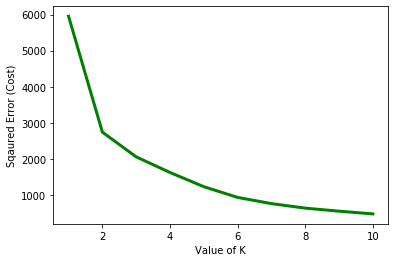

In [527]:
# determining the k-value for k-means clustering

from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(cluster_dataset) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the most optimal value for choosing k 

In [528]:
#I tried with 2 clusters, but 3 clusters proved to be better at differentiating Østerbro AirBnB hosts
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
print(labels)

[2 1 0 ... 1 1 1]


In [529]:
# get labels for the 3 clusters into the full dataset
df_osterbro['Labels'] = labels

In [539]:
# looking at the differences between the 3 clusters
df_osterbro.groupby('Labels').mean().round(3).reset_index()

,Labels,accommodates,bathrooms,bedrooms,beds,Distance_to_Citycenter,price_num,latitude,longitude,number_of_reviews,reviews_per_month,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Entire home/apt,Private room,Shared room
0,0,3.118,1.051,1.473,1.872,3.377,828.845,55.705,12.586,10.357,0.533,49.664,95.484,9.737,9.394,9.816,9.847,9.567,9.469,0.902,0.095,0.002
1,1,3.343,1.101,1.572,2.083,4.074,840.222,55.713,12.568,11.521,0.627,47.240,94.807,9.695,9.337,9.813,9.835,9.387,9.399,0.824,0.175,0.001
2,2,3.583,1.083,1.807,2.336,2.579,963.994,55.699,12.578,12.120,0.527,47.827,95.934,9.824,9.491,9.846,9.888,9.761,9.521,0.865,0.133,0.002


In [542]:
# looking at the differences between the 3 clusters
df_osterbro[['Labels', 'Distance_to_Citycenter', 'price_num', 'reviews_per_month', 'availability_365', 
             'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value', 
             ]].groupby('Labels').mean().round(3).reset_index().to_csv('tabel_report.csv')

In [535]:
# assign colors to the 3 clusters
df_osterbro_map = df_osterbro.groupby('Labels').mean().round(3).reset_index()
df_osterbro_map['color'] = np.where(df_osterbro_map['Labels'] == 0, "green", np.where(df_osterbro_map['Labels']==1, "yellow", 'red'))

In [537]:
# Create map for visualizing the location of the 3 clusters in Østerbro
l = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)

colors = {0 : 'red', 1 : 'yellow', 2 : 'green'}

df_osterbro_map.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                              radius=10, fill_color=row['Labels'], popup=row['color'])
                                             .add_to(l), axis=1)
l